## CAB PROJECT

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets into Pandas DataFrames.
cab_data = pd.read_csv('./DataSets/Cab_Data.csv')
city_data = pd.read_csv('./DataSets/City.csv')
customer_data = pd.read_csv('./DataSets/Customer_ID.csv')
transaction_data = pd.read_csv('./DataSets/Transaction_ID.csv')


### cab_data

In [195]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [196]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [197]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


The dataset contains approximately 359,392 records of cab rides, which indicates a substantial volume of data.
The rides span various cities, including Atlanta, Austin, and Boston, and so on, which implies geographical diversity.
There are no apparent NaN values as per the .info() output, indicating completeness in primary fields.
The 'Date of Travel' is an integer type, which is unconventional. This may indicate encoded dates that will require conversion to a datetime format for analysis.
- Potential Outliers: The 'Price Charged' and 'Cost of Trip' have wide ranges, with maximum values significantly higher than the mean. Further investigation is needed to determine if these are outliers or legitimate high-value transactions.
- Data Types: The 'City' and 'Company' fields are object types, which is appropriate for categorical data.

In [198]:
# Get unique companies and cities
unique_companies = cab_data['Company'].unique()
unique_cities = cab_data['City'].unique()

unique_companies, unique_cities




(array(['Pink Cab', 'Yellow Cab'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object))

### city_data

In [199]:
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [200]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [201]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


There are 20 unique cities listed, with each city listed only once, which means we have a single data point per city.
Both population and the number of users are provided as object types, which suggests they may contain non-numeric characters or are formatted as strings and will need conversion to numerical types for analysis.
- Data Completeness: No NaN values are evident, suggesting complete records for the cities provided.
- Insights on Cab Users: New York City has the highest number of users according to the 'top' in the .describe() output, which could be indicative of market penetration or popularity.

### customer_data

In [202]:
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [203]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [204]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The dataset contains demographic information for 49,171 customers.
Customers range in age from 18 to 65, which represents a broad demographic.
The income column indicates a mean monthly income of around 15,015 USD with substantial variability, as indicated by the standard deviation. It may be beneficial to analyze income brackets.
- Data Completeness: There are no missing values in any of the columns, as seen in the .info() output.
- Data Types: The 'Gender' field is object type, which is typical for categorical data.


### transaction_data

In [205]:
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [206]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [207]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


There are 440,098 transactions recorded, which surpasses the number of rides in cab_data. This discrepancy may warrant further investigation.
- Data Types: The 'Payment_Mode' is an object type, appropriate for categorical data.
- Data Completeness: There are no NaN values, suggesting that each transaction has a recorded payment mode and customer ID.

In [208]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Assuming 'cab_data' is loaded into a DataFrame with actual data.
# # cab_data = pd.read_csv('path_to_cab_data.csv')

# # Hypothetical example data for visualization purposes.
# # Please replace with the actual data for accurate plots.
# cab_data = pd.DataFrame({
#     'City': np.random.choice(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA'], 500),
#     'KM Travelled': np.random.normal(loc=22, scale=10, size=500)
# })

# # Setting the aesthetic style of the plots.
# sns.set_style("dark")
# girlish_palette = sns.color_palette(["lightblue", "pink"])

# # Distribution of KM Travelled by City.
# plt.figure(figsize=(10, 6))
# sns.histplot(data=cab_data, x='KM Travelled', hue='City', palette=girlish_palette, kde=True)
# plt.title('Distribution of KM Travelled by City for Pink Cab')
# plt.xlabel('KM Travelled')
# plt.ylabel('Count')
# plt.show()

### Merged data frames

In [209]:

# Merge Cab Data with Transaction Data on 'Transaction ID'.
combined_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')

# Merge the combined data with Customer Data on 'Customer ID'.
combined_data = pd.merge(combined_data, customer_data, on='Customer ID', how='inner')

# Since 'City' might be formatted differently in City Data, we may need to ensure the formatting matches.
# For instance, if 'City' in city_data has the format 'City State' (e.g., 'NEW YORK NY'), but in cab_data it's just 'City' (e.g., 'NEW YORK'),
# we may need to adjust one of them to match the other.

# Assuming no adjustment is needed, merge with City Data on 'City'.
combined_data = pd.merge(combined_data, city_data, on='City', how='inner')

#The 'combined_data' DataFrame now contains all the merged data.
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


In [210]:
import pandas as pd

# Assuming the integer date is the number of days since 1900-01-01
# and assuming 'combined_data' is your DataFrame
# First, set the epoch
epoch = pd.to_datetime('1900-01-01')

# Now convert 'Date of Travel' to datetime
combined_data['Date of Travel'] = pd.to_timedelta(combined_data['Date of Travel'], unit='D') + epoch

# Now 'Date of Travel' is in datetime format
combined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


In [211]:
combined_data['Date of Travel'].min()

Timestamp('2016-01-04 00:00:00')

In [212]:
combined_data['Date of Travel'].max()

Timestamp('2019-01-02 00:00:00')

In [213]:
# unm_data = pd.read_csv('./DataSets/UNRATE.csv')
# unm_data


In [214]:
# import pandas as pd

# # Assuming 'combined_data' and 'unm_data' are already loaded DataFrames

# # Convert 'Date of Travel' to datetime if it's not already
# combined_data['Date of Travel'] = pd.to_datetime(combined_data['Date of Travel'])

# # Convert 'DATE' to datetime if it's not already
# unm_data['DATE'] = pd.to_datetime(unm_data['DATE'])

# # Extract year and month from 'Date of Travel' and 'DATE'
# combined_data['YearMonth'] = combined_data['Date of Travel'].dt.to_period('M')
# unm_data['YearMonth'] = unm_data['DATE'].dt.to_period('M')

# # Merge the dataframes on the 'YearMonth' field
# combined_data = combined_data.merge(unm_data, left_on='YearMonth', right_on='YearMonth', how='left')

# # Since 'Date of Travel' and 'DATE' are no longer needed for the merge, we can drop one of them if you want
# combined_data.drop(columns=['DATE'], inplace=True)
# combined_data

In [215]:
gas_data = pd.read_csv('./DataSets/GASREGCOVW.csv')
gas_data

,DATE,GASREGCOVW
0,1990-08-20,1.191
1,1990-08-27,1.245
2,1990-09-03,1.242
3,1990-09-10,1.252
4,1990-09-17,1.266
...,...,...
1751,2024-03-11,3.27
1752,2024-03-18,3.348
1753,2024-03-25,3.409
1754,2024-04-01,3.401


In [216]:
# Assuming 'combined_data' and 'gas_data' are your dataframes and are already loaded.

# Convert 'DATE' column of gas_data to datetime if it's not already
gas_data['DATE'] = pd.to_datetime(gas_data['DATE'])

# Merge the dataframes based on the dates in 'Date of Travel' column
# Since 'Date of Travel' is already in datetime format, we can merge directly
merged_data = pd.merge(combined_data, gas_data, left_on='Date of Travel', right_on='DATE', how='inner')

# The merged_data now contains only the rows with dates that are present in 'Date of Travel'
merged_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,DATE,GASREGCOVW
0,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",2016-01-04,1.922
1,10000029,2016-01-04,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,"248,968","80,021",2016-01-04,1.922
2,10000030,2016-01-04,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,"248,968","80,021",2016-01-04,1.922
3,10000035,2016-01-11,Pink Cab,CHICAGO IL,4.48,55.27,51.5200,4734,Card,Male,33,30608,"1,955,130","164,468",2016-01-11,1.888
4,10000041,2016-01-04,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,"1,955,130","164,468",2016-01-04,1.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78229,10440059,2018-01-08,Yellow Cab,WASHINGTON DC,4.44,64.70,57.0096,52638,Card,Male,23,2932,"418,859","127,001",2018-01-08,2.429
78230,10440064,2018-01-08,Yellow Cab,WASHINGTON DC,18.02,254.64,237.8640,53314,Cash,Male,18,22770,"418,859","127,001",2018-01-08,2.429
78231,10440065,2018-01-08,Yellow Cab,WASHINGTON DC,37.83,534.57,526.5936,53891,Card,Female,58,4439,"418,859","127,001",2018-01-08,2.429
78232,10440083,2018-01-08,Yellow Cab,WASHINGTON DC,34.20,473.21,471.9600,52548,Card,Male,31,23046,"418,859","127,001",2018-01-08,2.429


In [217]:
combo =  merged_data

In [218]:
# Assuming 'combined_data' is your DataFrame after merging.
combo.rename(columns={'GASREGCOVW': 'gasoline_price'}, inplace=True)
combo

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,DATE,gasoline_price
0,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",2016-01-04,1.922
1,10000029,2016-01-04,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,"248,968","80,021",2016-01-04,1.922
2,10000030,2016-01-04,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,"248,968","80,021",2016-01-04,1.922
3,10000035,2016-01-11,Pink Cab,CHICAGO IL,4.48,55.27,51.5200,4734,Card,Male,33,30608,"1,955,130","164,468",2016-01-11,1.888
4,10000041,2016-01-04,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,"1,955,130","164,468",2016-01-04,1.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78229,10440059,2018-01-08,Yellow Cab,WASHINGTON DC,4.44,64.70,57.0096,52638,Card,Male,23,2932,"418,859","127,001",2018-01-08,2.429
78230,10440064,2018-01-08,Yellow Cab,WASHINGTON DC,18.02,254.64,237.8640,53314,Cash,Male,18,22770,"418,859","127,001",2018-01-08,2.429
78231,10440065,2018-01-08,Yellow Cab,WASHINGTON DC,37.83,534.57,526.5936,53891,Card,Female,58,4439,"418,859","127,001",2018-01-08,2.429
78232,10440083,2018-01-08,Yellow Cab,WASHINGTON DC,34.20,473.21,471.9600,52548,Card,Male,31,23046,"418,859","127,001",2018-01-08,2.429


In [219]:
combo = combo.drop(columns={ 'DATE'} , axis=1)
combo

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,gasoline_price
0,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",1.922
1,10000029,2016-01-04,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,"248,968","80,021",1.922
2,10000030,2016-01-04,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,"248,968","80,021",1.922
3,10000035,2016-01-11,Pink Cab,CHICAGO IL,4.48,55.27,51.5200,4734,Card,Male,33,30608,"1,955,130","164,468",1.888
4,10000041,2016-01-04,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,"1,955,130","164,468",1.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78229,10440059,2018-01-08,Yellow Cab,WASHINGTON DC,4.44,64.70,57.0096,52638,Card,Male,23,2932,"418,859","127,001",2.429
78230,10440064,2018-01-08,Yellow Cab,WASHINGTON DC,18.02,254.64,237.8640,53314,Cash,Male,18,22770,"418,859","127,001",2.429
78231,10440065,2018-01-08,Yellow Cab,WASHINGTON DC,37.83,534.57,526.5936,53891,Card,Female,58,4439,"418,859","127,001",2.429
78232,10440083,2018-01-08,Yellow Cab,WASHINGTON DC,34.20,473.21,471.9600,52548,Card,Male,31,23046,"418,859","127,001",2.429


In [220]:
# # Convert 'YearMonth' to string if it's in Period format
# combo['YearMonth'] = combo['YearMonth'].astype(str)
# combo_saved = combo
# # Now save the DataFrame to an HDF5 file
# combo_saved.to_hdf('./DataSets/combo.h5', key='combo_saved', mode='w')


In [221]:
# # Saving the 'combo' DataFrame to an HDF5 file
combo.to_csv('./DataSets/combo.csv', index=None)
combo_data = pd.read_csv('./DataSets/combo.csv')

In [222]:
#combo_data.drop('Unnamed:0', axis=1)
combo_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,gasoline_price
0,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",1.922
1,10000029,2016-01-04,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,"248,968","80,021",1.922
2,10000030,2016-01-04,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,"248,968","80,021",1.922
3,10000035,2016-01-11,Pink Cab,CHICAGO IL,4.48,55.27,51.5200,4734,Card,Male,33,30608,"1,955,130","164,468",1.888
4,10000041,2016-01-04,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,"1,955,130","164,468",1.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78229,10440059,2018-01-08,Yellow Cab,WASHINGTON DC,4.44,64.70,57.0096,52638,Card,Male,23,2932,"418,859","127,001",2.429
78230,10440064,2018-01-08,Yellow Cab,WASHINGTON DC,18.02,254.64,237.8640,53314,Cash,Male,18,22770,"418,859","127,001",2.429
78231,10440065,2018-01-08,Yellow Cab,WASHINGTON DC,37.83,534.57,526.5936,53891,Card,Female,58,4439,"418,859","127,001",2.429
78232,10440083,2018-01-08,Yellow Cab,WASHINGTON DC,34.20,473.21,471.9600,52548,Card,Male,31,23046,"418,859","127,001",2.429


In [223]:
combo_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),gasoline_price
count,7.823400e+04,78234.000000,78234.000000,78234.000000,78234.000000,78234.000000,78234.000000,78234.000000
mean,1.022207e+07,22.555820,430.247719,286.091494,19211.910026,35.353798,15028.426388,2.376118
std,1.406576e+05,12.220766,277.651305,157.829804,21011.380893,12.559552,7957.242075,0.285964
min,1.000001e+07,1.900000,17.210000,19.400000,1.000000,18.000000,2001.000000,1.638000
25%,1.008831e+07,12.000000,210.502500,151.368000,2714.000000,25.000000,8417.000000,2.170000
50%,1.022942e+07,22.420000,392.330000,281.642400,7472.000000,33.000000,14652.500000,2.325000
75%,1.035452e+07,32.960000,593.445000,413.683200,36161.250000,42.000000,21009.000000,2.610000
max,1.044009e+07,48.000000,1875.110000,691.200000,60000.000000,65.000000,35000.000000,2.877000


In [224]:
combo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78234 entries, 0 to 78233
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      78234 non-null  int64  
 1   Date of Travel      78234 non-null  object 
 2   Company             78234 non-null  object 
 3   City                78234 non-null  object 
 4   KM Travelled        78234 non-null  float64
 5   Price Charged       78234 non-null  float64
 6   Cost of Trip        78234 non-null  float64
 7   Customer ID         78234 non-null  int64  
 8   Payment_Mode        78234 non-null  object 
 9   Gender              78234 non-null  object 
 10  Age                 78234 non-null  int64  
 11  Income (USD/Month)  78234 non-null  int64  
 12  Population          78234 non-null  object 
 13  Users               78234 non-null  object 
 14  gasoline_price      78234 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 9.0+

In [225]:
# Check for NaN values across the DataFrame
combo_data.isna().any()

Transaction ID        False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
Population            False
Users                 False
gasoline_price        False
dtype: bool

In [226]:
# Calculate profit for each trip (assumption: profit = price charged - cost of trip)
combo_data['Profit'] = combo_data['Price Charged'] - combo_data['Cost of Trip']
combo_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,gasoline_price,Profit
0,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",1.922,27.5680
1,10000029,2016-01-04,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,"248,968","80,021",1.922,98.0060
2,10000030,2016-01-04,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,"248,968","80,021",1.922,191.7600
3,10000035,2016-01-11,Pink Cab,CHICAGO IL,4.48,55.27,51.5200,4734,Card,Male,33,30608,"1,955,130","164,468",1.888,3.7500
4,10000041,2016-01-04,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,"1,955,130","164,468",1.922,192.1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78229,10440059,2018-01-08,Yellow Cab,WASHINGTON DC,4.44,64.70,57.0096,52638,Card,Male,23,2932,"418,859","127,001",2.429,7.6904
78230,10440064,2018-01-08,Yellow Cab,WASHINGTON DC,18.02,254.64,237.8640,53314,Cash,Male,18,22770,"418,859","127,001",2.429,16.7760
78231,10440065,2018-01-08,Yellow Cab,WASHINGTON DC,37.83,534.57,526.5936,53891,Card,Female,58,4439,"418,859","127,001",2.429,7.9764
78232,10440083,2018-01-08,Yellow Cab,WASHINGTON DC,34.20,473.21,471.9600,52548,Card,Male,31,23046,"418,859","127,001",2.429,1.2500


In [227]:
# Group by company and calculate total profit, mean profit per trip, and count of trips
company_profit_analysis = combo_data.groupby('Company').agg(
    Total_Profit=pd.NamedAgg(column='Profit', aggfunc='sum'),
    Mean_Profit=pd.NamedAgg(column='Profit', aggfunc='mean'),
    Trip_Count=pd.NamedAgg(column='Profit', aggfunc='count')
).reset_index()

In [228]:
company_profit_analysis

,Company,Total_Profit,Mean_Profit,Trip_Count
0,Pink Cab,1.235507e+06,67.687886,18253
1,Yellow Cab,1.004241e+07,167.426537,59981


In [229]:
combined_data = combo_data

/tmp/ipykernel_8206/1663769625.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = combo_data.groupby([pd.Grouper(freq='M'), 'Company'])['Profit'].mean().unstack()
/home/lucy/anaconda3/envs/lucy/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


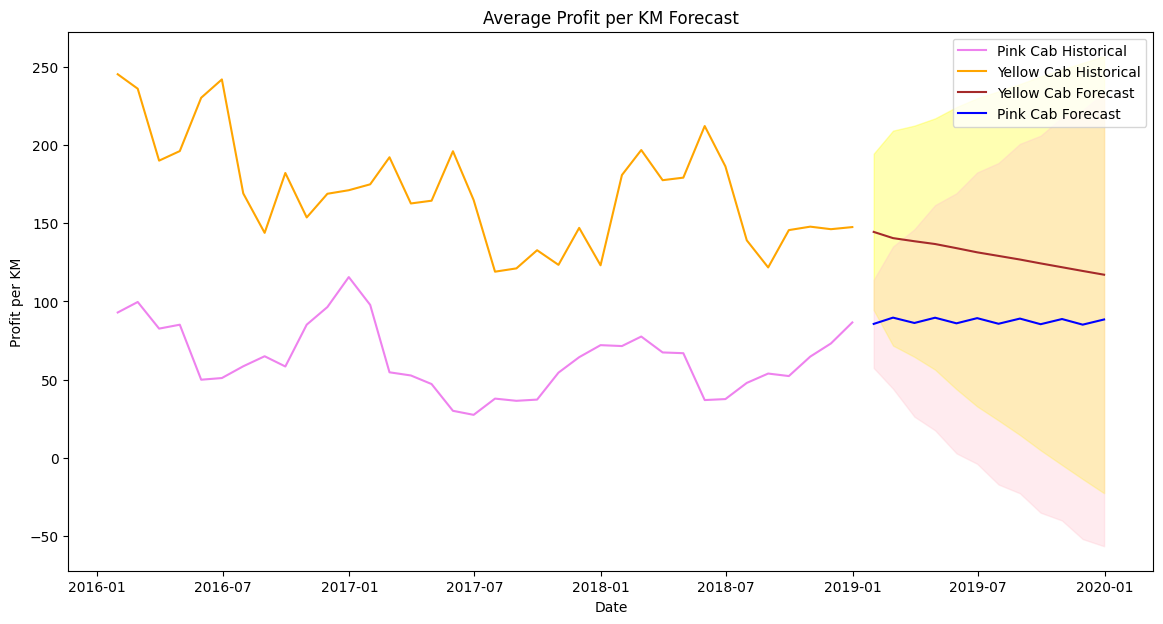

In [230]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming combo_data is already loaded and preprocessed with the 'Date of Travel' set as a datetime index
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
combo_data.set_index('Date of Travel', inplace=True)

# Step 1: Aggregate data by month and calculate the mean profit per KM
monthly_profit = combo_data.groupby([pd.Grouper(freq='M'), 'Company'])['Profit'].mean().unstack()

# Step 2: Determine the best ARIMA parameters (the code below is just a placeholder and won't run here)
# You'll need to run your own analysis using ACF, PACF, and possibly a grid search to find the best (p, d, q)

# Step 3: Fit ARIMA model for each company
# Example for one company, repeat for the other
model_yellow = ARIMA(monthly_profit['Yellow Cab'], order=(2, 2, 2))
model_yellow_fit = model_yellow.fit()

model_pink = ARIMA(monthly_profit['Pink Cab'], order=(2, 2, 2))
model_pink_fit = model_pink.fit()

#
# Step 4: Forecasting
forecast_results = model_yellow_fit.get_forecast(steps=12)
forecast_yellow = forecast_results.predicted_mean
conf_int_yellow = forecast_results.conf_int(alpha=0.05)  # 95% conf

forecast_results = model_pink_fit.get_forecast(steps=12)
forecast_pink = forecast_results.predicted_mean
conf_int_pink = forecast_results.conf_int(alpha=0.05)  # 95% conf



# Step 5: Plotting the historical data and forecasts with confidence intervals
plt.figure(figsize=(14, 7))
# Plot historical data
plt.plot(monthly_profit.index, monthly_profit['Pink Cab'], label='Pink Cab Historical', c='violet')
plt.plot(monthly_profit.index, monthly_profit['Yellow Cab'], label='Yellow Cab Historical', c='orange')
# Plot forecast
plt.plot(pd.date_range(monthly_profit.index[-1], periods=13, freq='ME')[1:], forecast_yellow, label='Yellow Cab Forecast', c='brown')
plt.plot(pd.date_range(monthly_profit.index[-1], periods=13, freq='ME')[1:], forecast_pink, label='Pink Cab Forecast', c='blue')
# Plot confidence intervals
forecast_dates = pd.date_range(monthly_profit.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='ME')
plt.fill_between(forecast_dates, conf_int_yellow.iloc[:, 0], conf_int_yellow.iloc[:, 1], color='yellow', alpha=0.3)
forecast_dates = pd.date_range(monthly_profit.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='ME')
plt.fill_between(forecast_dates, conf_int_pink.iloc[:, 0], conf_int_pink.iloc[:, 1], color='pink', alpha=0.3)

# Repeat plotting for 'Yellow Cab'

plt.title('Average Profit per KM Forecast')
plt.xlabel('Date')
plt.ylabel('Profit per KM')
plt.legend()
plt.show()


/tmp/ipykernel_8206/1674374029.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pink = pink_cab_data.resample('M').agg({'Profit': 'mean', 'gasoline_price': 'mean'})
/tmp/ipykernel_8206/1674374029.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_yellow = yellow_cab_data.resample('M').agg({'Profit': 'mean', 'gasoline_price': 'mean'})


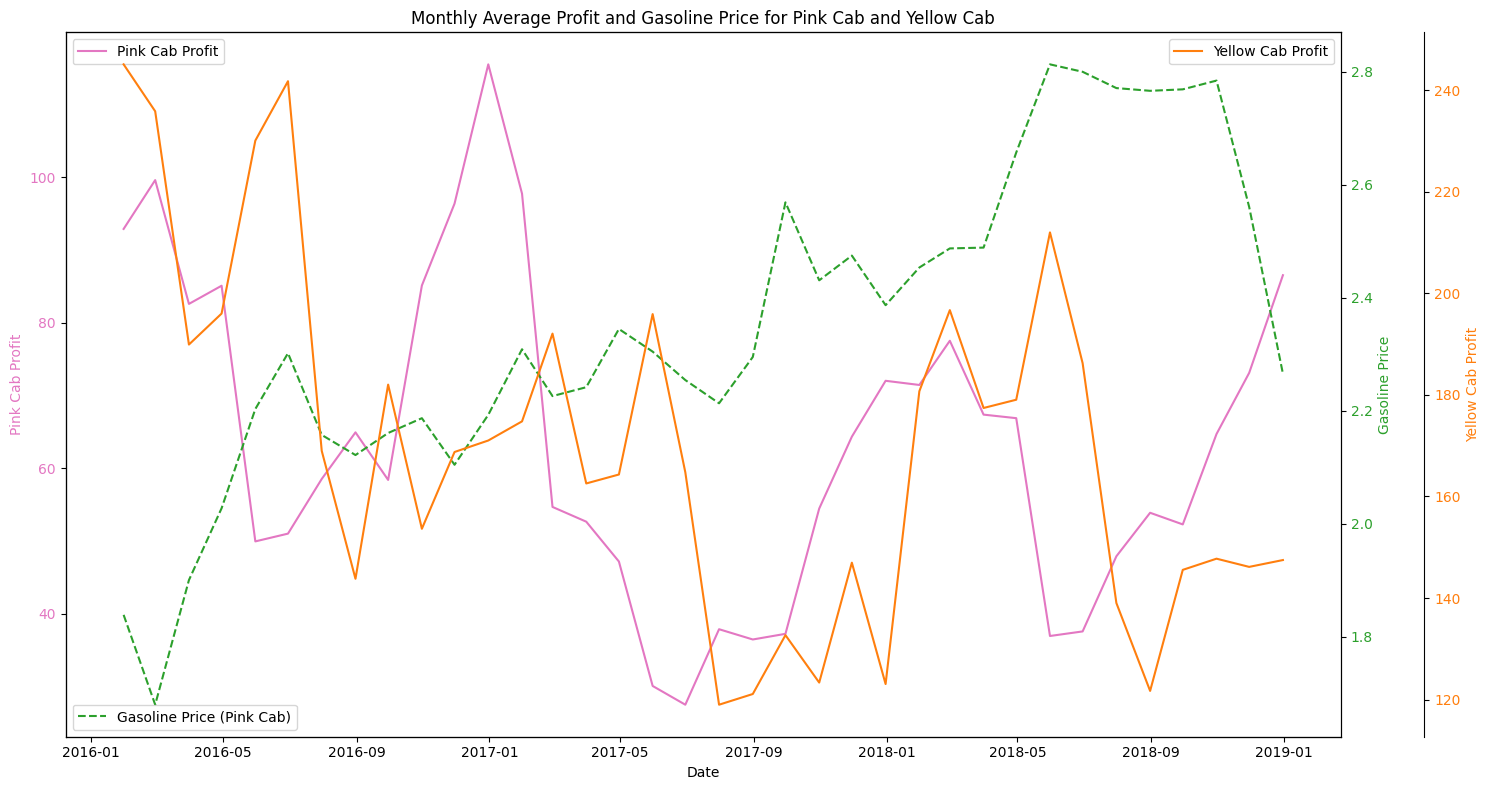

The correlation coefficient between monthly average profit and gasoline price for Pink Cab is: -0.47
The correlation coefficient between monthly average profit and gasoline price for Yellow Cab is: -0.40


In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combo_data' is already loaded with 'Date of Travel' as a datetime index

# Separate the data for each company
pink_cab_data = combo_data[combo_data['Company'] == 'Pink Cab']
yellow_cab_data = combo_data[combo_data['Company'] == 'Yellow Cab']

# Resample to get monthly data for each company
monthly_pink = pink_cab_data.resample('M').agg({'Profit': 'mean', 'gasoline_price': 'mean'})
monthly_yellow = yellow_cab_data.resample('M').agg({'Profit': 'mean', 'gasoline_price': 'mean'})

# Create a two y-axes plot for each company's profit and gasoline price
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Pink Cab data
color = 'tab:pink'
ax1.set_xlabel('Date')
ax1.set_ylabel('Pink Cab Profit', color=color)
ax1.plot(monthly_pink.index, monthly_pink['Profit'], color=color, label='Pink Cab Profit')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for gasoline price
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Gasoline Price', color=color)
ax2.plot(monthly_pink.index, monthly_pink['gasoline_price'], color=color, linestyle='--', label='Gasoline Price (Pink Cab)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower left')

# Plot Yellow Cab data on the same axes
color = 'tab:orange'
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax3
ax3.set_ylabel('Yellow Cab Profit', color=color)
ax3.plot(monthly_yellow.index, monthly_yellow['Profit'], color=color, label='Yellow Cab Profit')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='upper right')


# Title and show
plt.title('Monthly Average Profit and Gasoline Price for Pink Cab and Yellow Cab')
fig.tight_layout()  # To make sure that the labels don't get cut off
plt.show()

# Calculate and print the correlation for each company
correlation_pink = monthly_pink['Profit'].corr(monthly_pink['gasoline_price'])
correlation_yellow = monthly_yellow['Profit'].corr(monthly_yellow['gasoline_price'])
print(f'The correlation coefficient between monthly average profit and gasoline price for Pink Cab is: {correlation_pink:.2f}')
print(f'The correlation coefficient between monthly average profit and gasoline price for Yellow Cab is: {correlation_yellow:.2f}')



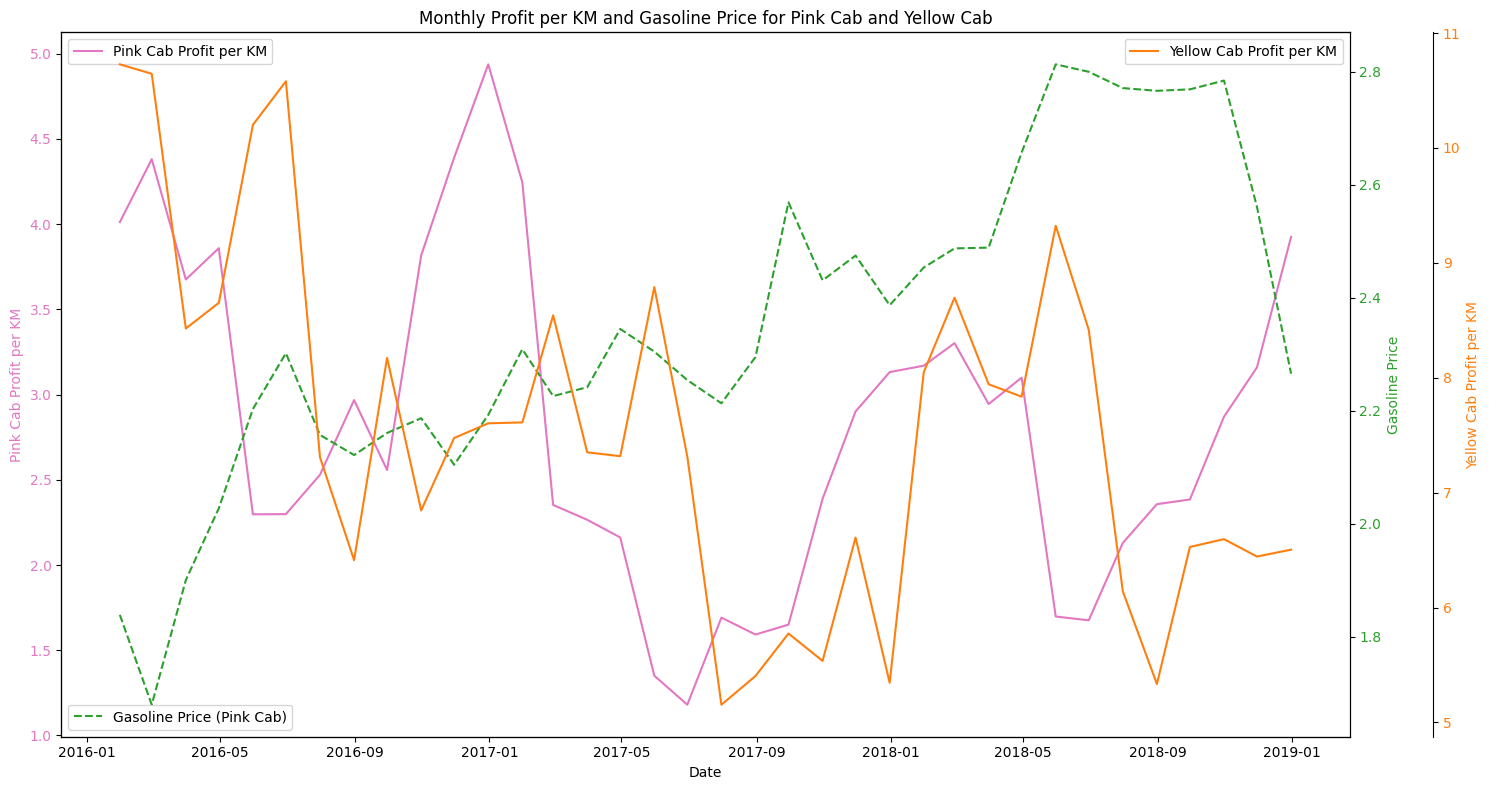

The correlation coefficient between monthly average profit per KM and gasoline price for Pink Cab is: -0.46
The correlation coefficient between monthly average profit per KM and gasoline price for Yellow Cab is: -0.40


In [232]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combo_data' is already loaded with 'Date of Travel' as a datetime index

# Calculate monthly profit per KM by dividing the sum of profit by the sum of KM travelled
def calculate_profit_per_km(df):
    monthly_data = df.resample('ME').agg({'Profit': 'sum', 'KM Travelled': 'sum'})
    monthly_data['Profit per KM'] = monthly_data['Profit'] / monthly_data['KM Travelled']
    return monthly_data

# Separate the data for Pink Cab and Yellow Cab
pink_cab_data = combo_data[combo_data['Company'] == 'Pink Cab']
yellow_cab_data = combo_data[combo_data['Company'] == 'Yellow Cab']

# Calculate monthly profit per KM and gasoline price for Pink Cab and Yellow Cab
monthly_pink = calculate_profit_per_km(pink_cab_data)
monthly_pink['Gasoline Price'] = pink_cab_data['gasoline_price'].resample('ME').mean()

monthly_yellow = calculate_profit_per_km(yellow_cab_data)
monthly_yellow['Gasoline Price'] = yellow_cab_data['gasoline_price'].resample('ME').mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Pink Cab data
color = 'tab:pink'
ax1.set_xlabel('Date')
ax1.set_ylabel('Pink Cab Profit per KM', color=color)
ax1.plot(monthly_pink.index, monthly_pink['Profit per KM'], color=color, label='Pink Cab Profit per KM')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for gasoline price
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Gasoline Price', color=color)
ax2.plot(monthly_pink.index, monthly_pink['Gasoline Price'], color=color, linestyle='--', label='Gasoline Price (Pink Cab)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower left')

# Plot Yellow Cab data on the same axes
color = 'tab:orange'
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax3
ax3.set_ylabel('Yellow Cab Profit per KM', color=color)
ax3.plot(monthly_yellow.index, monthly_yellow['Profit per KM'], color=color, label='Yellow Cab Profit per KM')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='upper right')

plt.title('Monthly Profit per KM and Gasoline Price for Pink Cab and Yellow Cab')
fig.tight_layout()  # To make sure that the labels don't get cut off
plt.show()

# Calculate and print the correlation for each company
correlation_pink = monthly_pink['Profit per KM'].corr(monthly_pink['Gasoline Price'])
correlation_yellow = monthly_yellow['Profit per KM'].corr(monthly_yellow['Gasoline Price'])
print(f'The correlation coefficient between monthly average profit per KM and gasoline price for Pink Cab is: {correlation_pink:.2f}')
print(f'The correlation coefficient between monthly average profit per KM and gasoline price for Yellow Cab is: {correlation_yellow:.2f}')


00:22:46 - cmdstanpy - INFO - Chain [1] start processing
00:22:46 - cmdstanpy - INFO - Chain [1] done processing
00:22:47 - cmdstanpy - INFO - Chain [1] start processing
00:22:47 - cmdstanpy - INFO - Chain [1] done processing


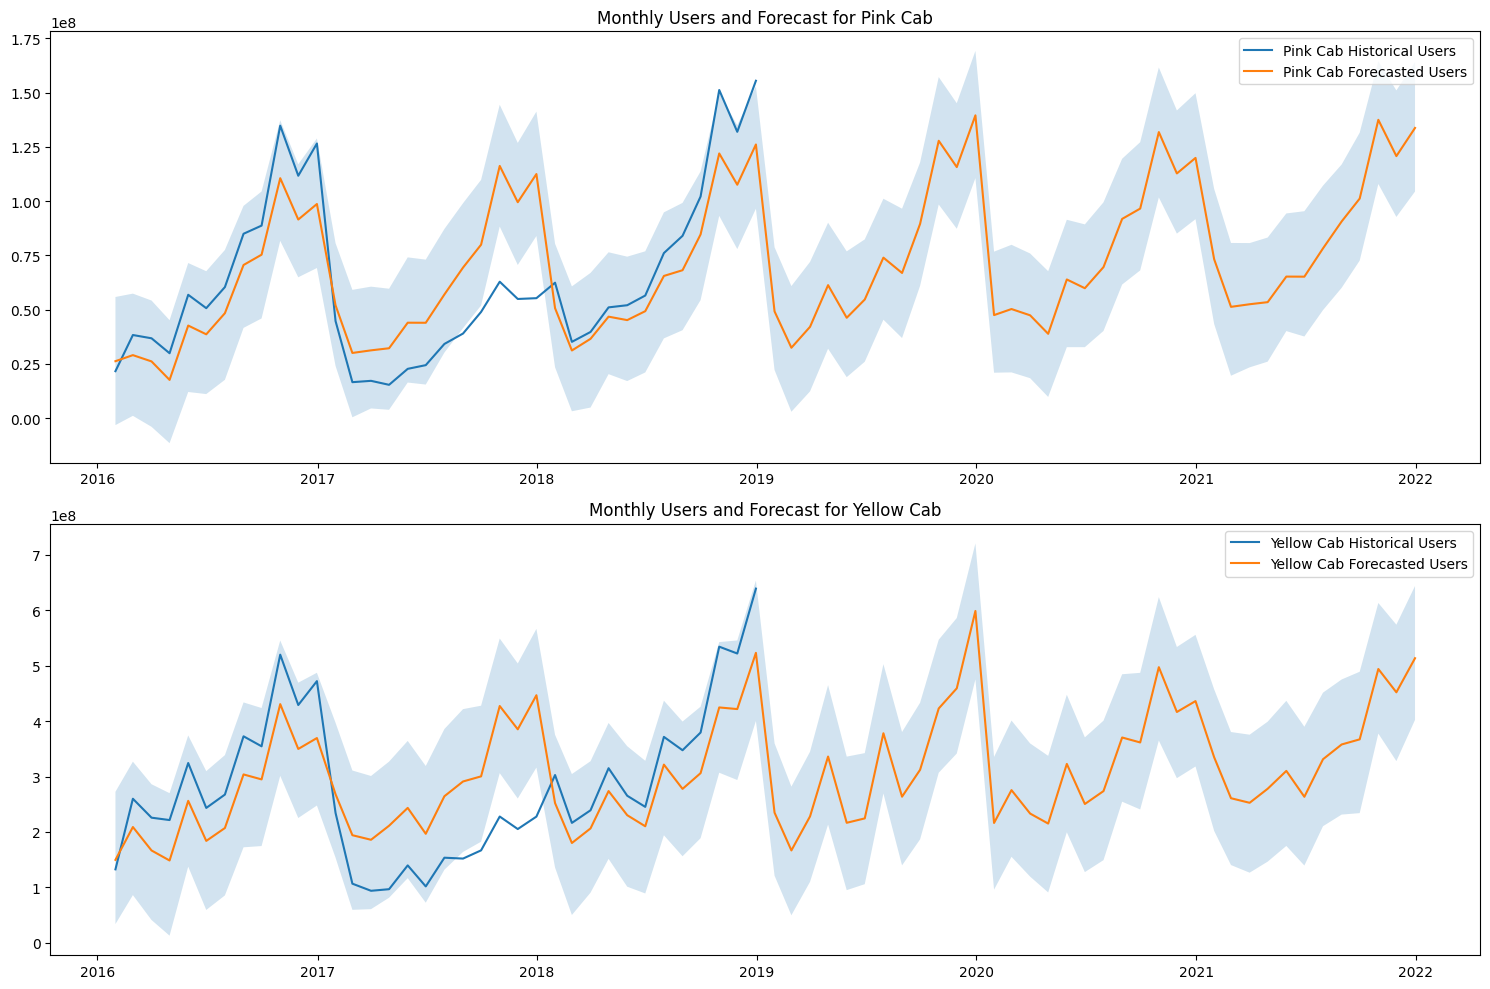

In [233]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combo_data' is already loaded with 'Date of Travel' as a datetime index
combo = combo_data.copy()
# Clean the 'Users' data
combo['Users'] = pd.to_numeric(combo['Users'].str.replace(',', ''), errors='coerce')

# Data Preparation for Pink Cab
pink_cab_data = combo[combo['Company'] == 'Pink Cab']
monthly_users_pink = pink_cab_data.resample('ME').agg({'Users': 'sum'}).reset_index()
monthly_users_pink.rename(columns={'Date of Travel': 'ds', 'Users': 'y'}, inplace=True)

# Data Preparation for Yellow Cab
yellow_cab_data = combo[combo['Company'] == 'Yellow Cab']
monthly_users_yellow = yellow_cab_data.resample('ME').agg({'Users': 'sum'}).reset_index()
monthly_users_yellow.rename(columns={'Date of Travel': 'ds', 'Users': 'y'}, inplace=True)

# Prophet Model Training for Pink Cab
prophet_pink = Prophet(yearly_seasonality=True)
prophet_pink.fit(monthly_users_pink)

# Prophet Model Training for Yellow Cab
prophet_yellow = Prophet(yearly_seasonality=True)
prophet_yellow.fit(monthly_users_yellow)

# Forecasting for the next 12 months for Pink Cab
future_pink = prophet_pink.make_future_dataframe(periods=36, freq='ME')
forecast_pink = prophet_pink.predict(future_pink)

# Forecasting for the next 12 months for Yellow Cab
future_yellow = prophet_yellow.make_future_dataframe(periods=36, freq='ME')
forecast_yellow = prophet_yellow.predict(future_yellow)

# Plotting Historical Data and Forecasts for Pink Cab
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(monthly_users_pink['ds'], monthly_users_pink['y'], label='Pink Cab Historical Users')
plt.plot(future_pink['ds'], forecast_pink['yhat'], label='Pink Cab Forecasted Users')
plt.fill_between(future_pink['ds'], forecast_pink['yhat_lower'], forecast_pink['yhat_upper'], alpha=0.2)
plt.legend()
plt.title('Monthly Users and Forecast for Pink Cab')

# Plotting Historical Data and Forecasts for Yellow Cab
plt.subplot(2, 1, 2)
plt.plot(monthly_users_yellow['ds'], monthly_users_yellow['y'], label='Yellow Cab Historical Users')
plt.plot(future_yellow['ds'], forecast_yellow['yhat'], label='Yellow Cab Forecasted Users')
plt.fill_between(future_yellow['ds'], forecast_yellow['yhat_lower'], forecast_yellow['yhat_upper'], alpha=0.2)
plt.legend()
plt.title('Monthly Users and Forecast for Yellow Cab')

plt.tight_layout()
plt.show()



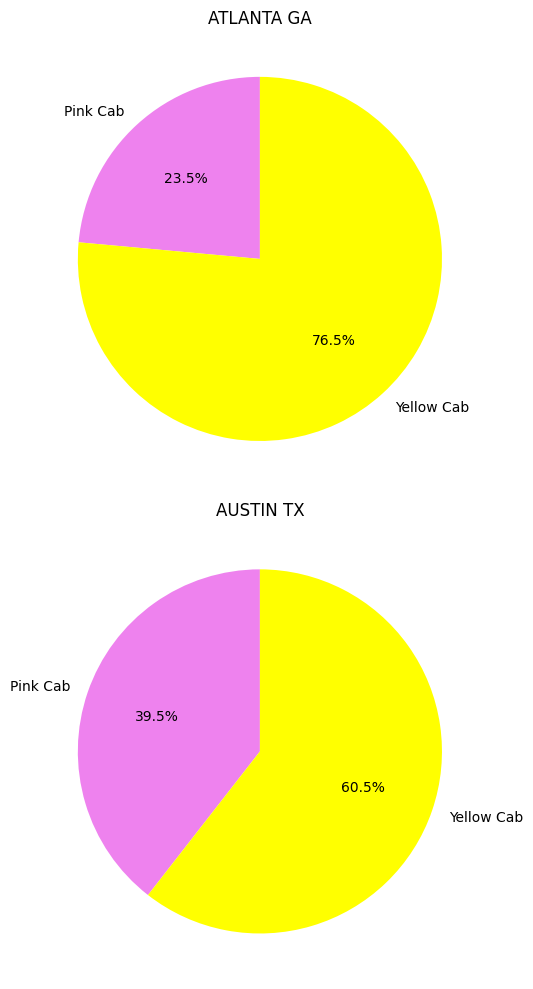

In [235]:
combo_data['Users'] = combo_data['Users'].str.replace(',', '').astype(int)

# Assuming 'combo_data' is your DataFrame and it has been loaded correctly
# First, aggregate the data by City and Company
city_company_agg = combo_data.groupby(['City', 'Company'])['Users'].sum().unstack(fill_value=0)

# Set the colors for each company
colors = {'Pink Cab': 'violet', 'Yellow Cab': 'yellow'}

# Create the figure and axes for the subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # Adjust the figure size as necessary

# Loop through each city and create a pie chart on its respective subplot
for ax, (index, row) in zip(axs, city_company_agg.iterrows()):
    # Only take the row for Pink and Yellow cabs
    row = row[['Pink Cab', 'Yellow Cab']]
    ax.pie(row, labels=row.index, colors=[colors[name] for name in row.index], autopct='%1.1f%%', startangle=90)
    ax.set_title(index)

plt.tight_layout()
plt.show()



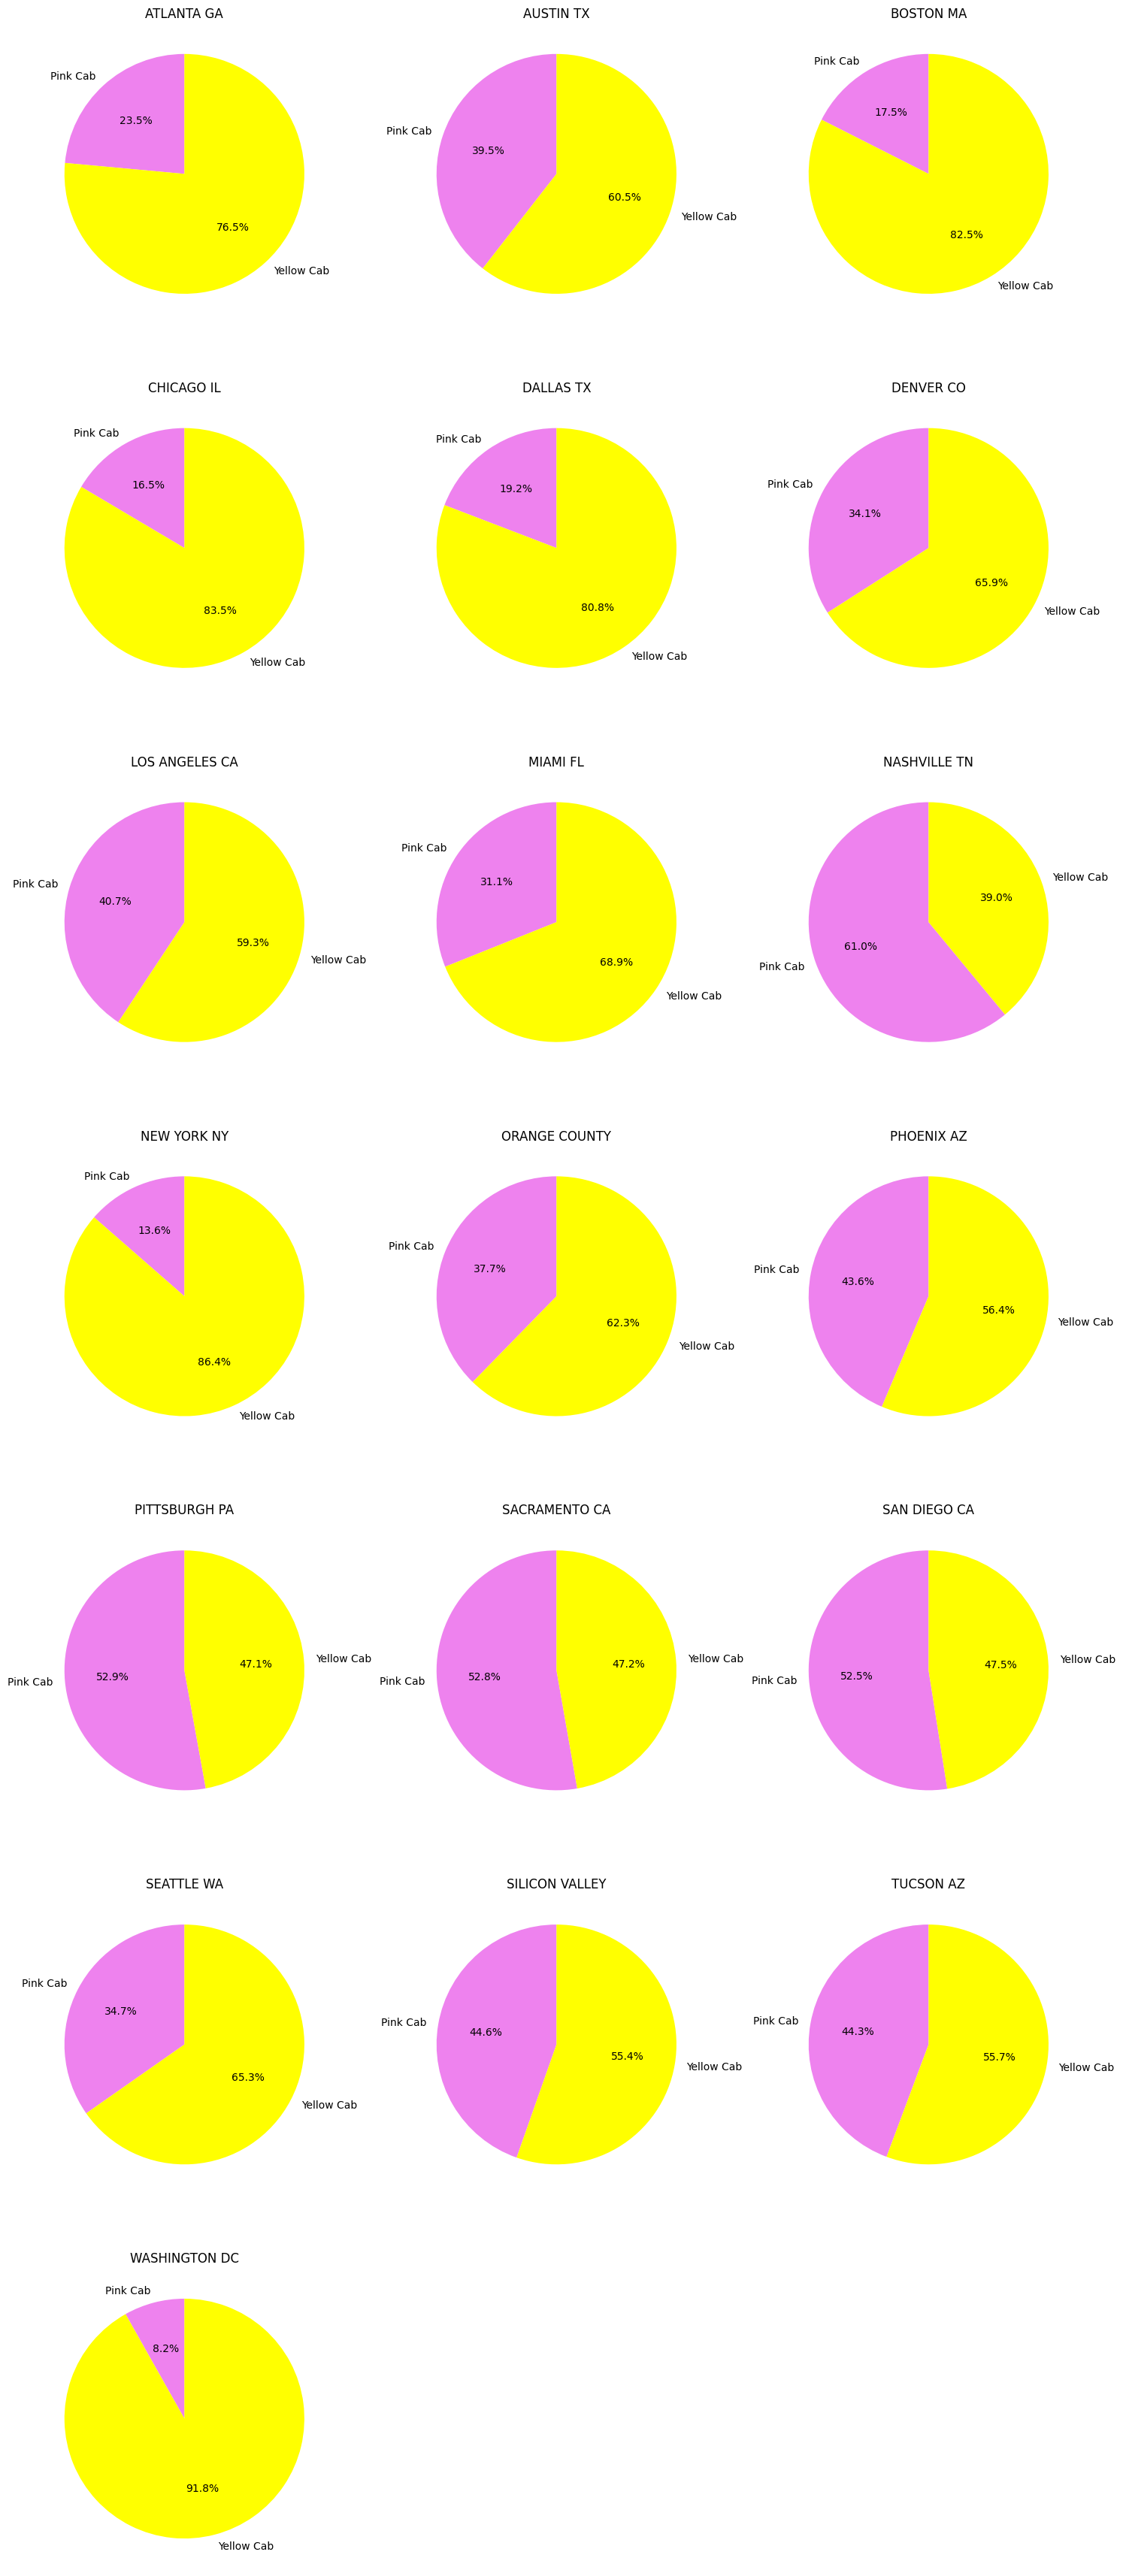

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming combo_data is your DataFrame and it includes 'City', 'Company', and 'Users' columns.
# First, you would group your data by 'City' and 'Company', and sum up the 'Users'.

# Let's assume combo_data has been cleaned and 'Users' are integers
#combo_data['Users'] = combo_data['Users'].str.replace(',', '').astype(int)
city_company_group = combo_data.groupby(['City', 'Company'])['Users'].sum().unstack(fill_value=0)

# Calculate the number of rows needed for the subplot array, with 3 charts per row
num_cities = city_company_group.shape[0]
num_rows = np.ceil(num_cities / 3).astype(int)

# Create the subplots - each row has up to 3 pie charts
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each city's data in a pie chart
for ax, (city, data) in zip(axes, city_company_group.iterrows()):
    data.plot(kind='pie', ax=ax, labels=data.index, colors=['violet', 'yellow'], autopct='%1.1f%%', startangle=90)
    ax.set_ylabel('')  # Remove the y-axis label
    ax.set_title(city)

# Hide any empty subplot slots if the number of cities isn't a multiple of 3
for i in range(num_cities, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


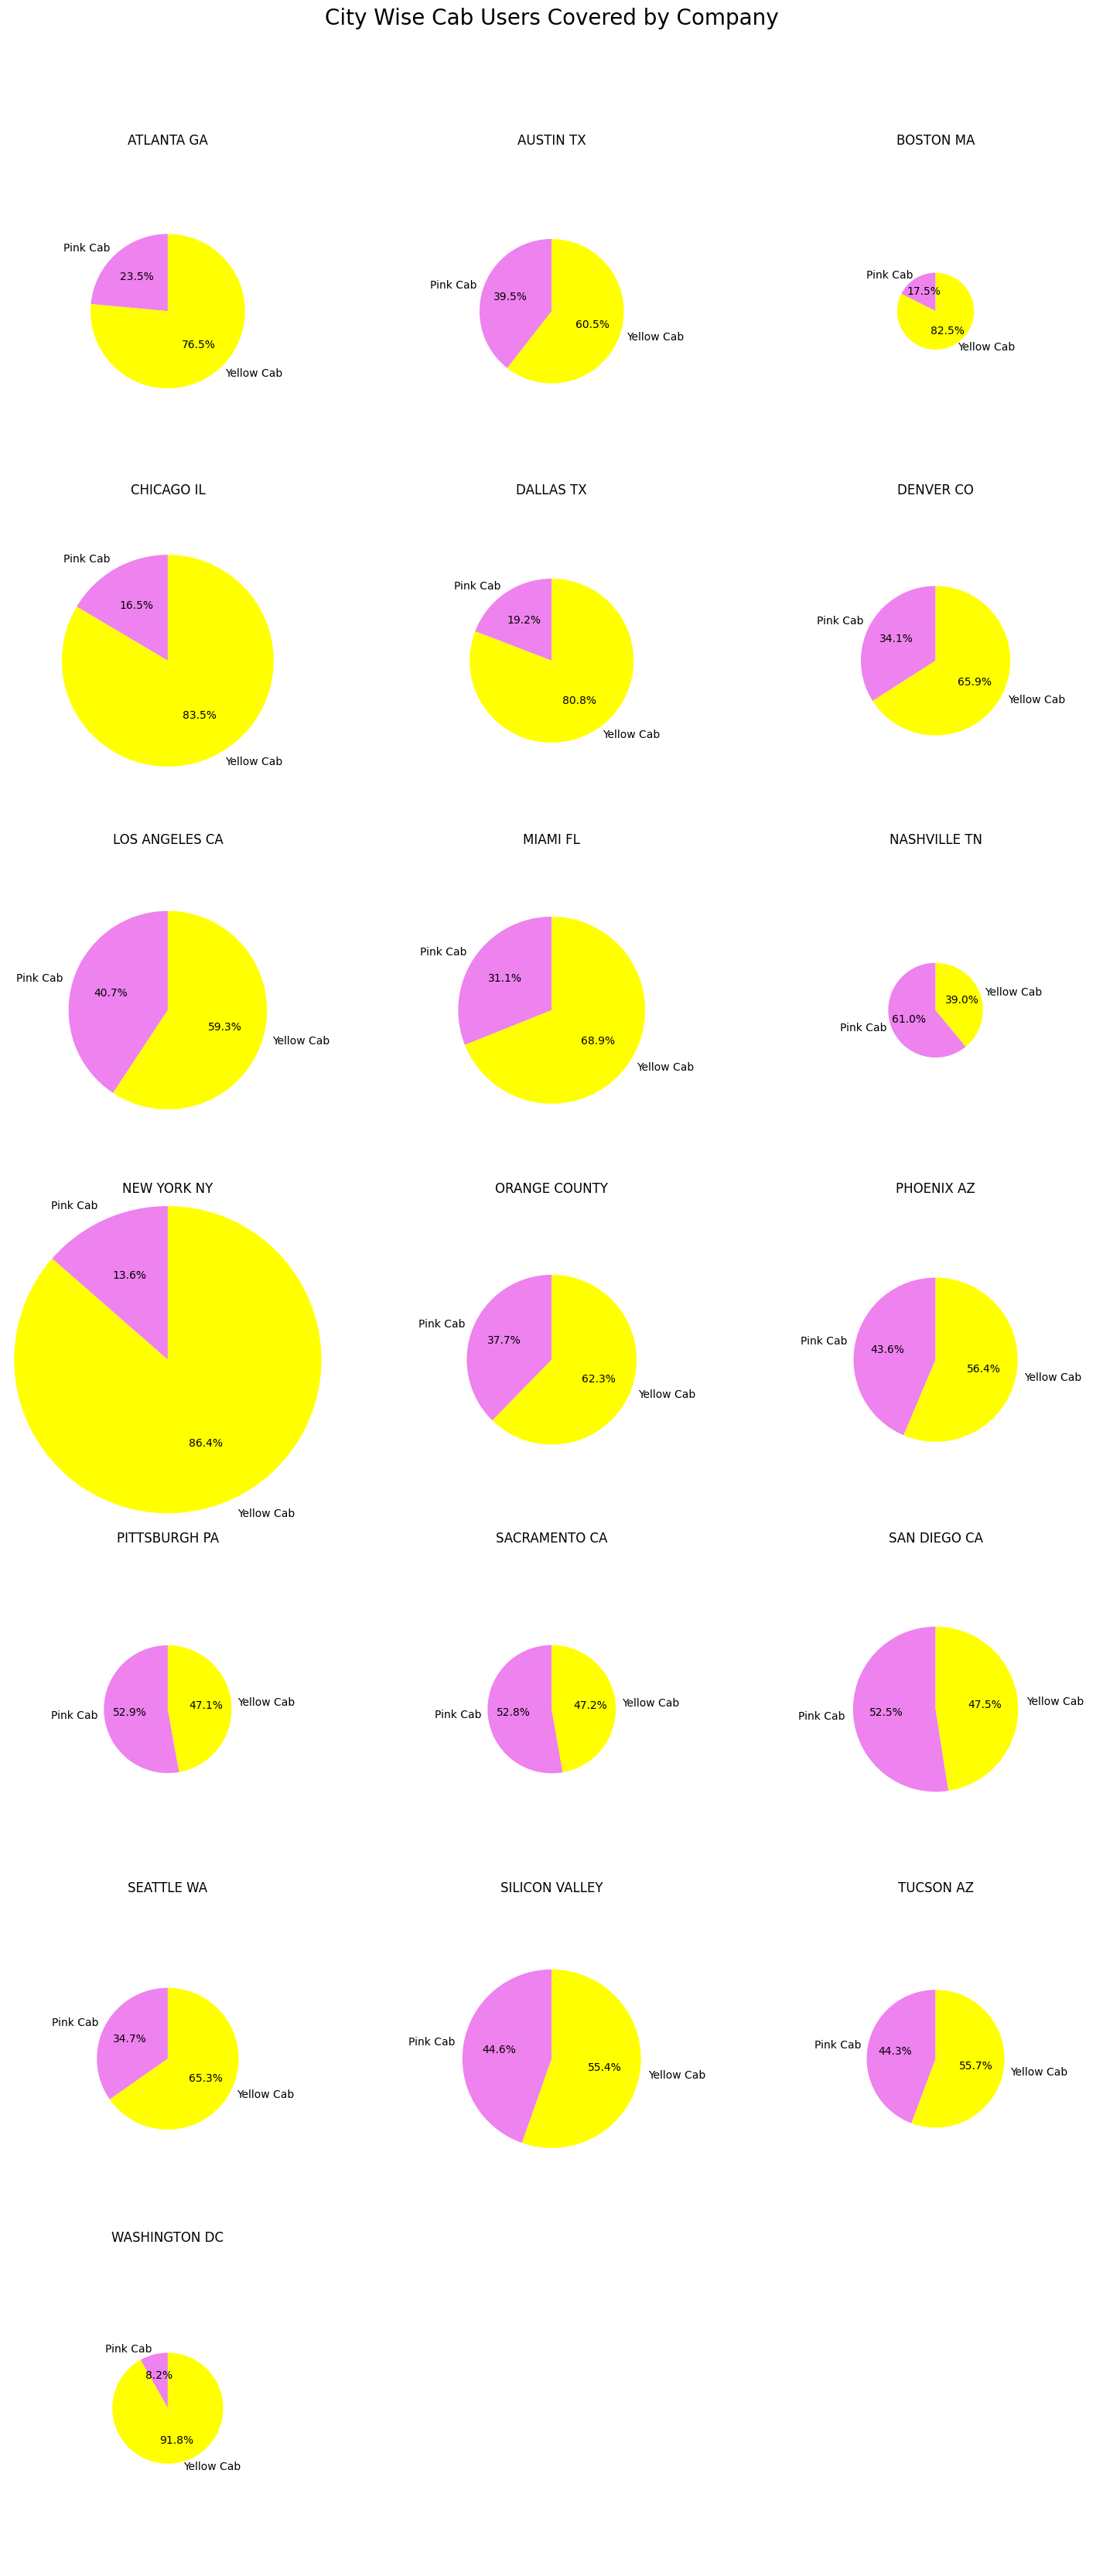

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming combo_data is your DataFrame and it includes 'City', 'Company', 'Users', and 'Population' columns.
# Clean and convert the 'Users' and 'Population' data to integers if they're not already.
#combo_data['Users'] = combo_data['Users'].str.replace(',', '').astype(int)
#combo_data['Population'] = combo_data['Population'].str.replace(',', '').astype(int)

# Assuming 'combo_data' is your DataFrame and includes 'City', 'Population' columns.
# Ensure 'Population' is converted to integers.
combo_data['Population'] = combo_data['Population'].str.replace(',', '').astype(int)

# Get the unique list of cities and their corresponding populations
city_population = combo_data[['City', 'Population']].drop_duplicates().set_index('City')['Population']

# Logarithmic scaling of population to radius
min_radius = 0.3  # Minimum radius for the smallest city
max_radius = 1.2  # Maximum radius for the largest city
pop_log_scale = np.log(city_population)
city_radius = (pop_log_scale - pop_log_scale.min()) / (pop_log_scale.max() - pop_log_scale.min())
city_radius = city_radius * (max_radius - min_radius) + min_radius

# Now city_radius is a Series indexed by city names


# Calculate the number of rows needed for the subplot array, with 3 charts per row.
num_cities = city_company_group.shape[0]
num_rows = np.ceil(num_cities / 3).astype(int)

# Create the subplots - each row has up to 3 pie charts.
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration.
axes = axes.flatten()

# Plot each city's data in a pie chart.
for ax, (city, data) in zip(axes, city_company_group.iterrows()):
    radius = city_radius.loc[city]  # Use .loc to access the radius by city name
    data.plot(kind='pie', ax=ax, labels=data.index, colors=['violet', 'yellow'], autopct='%1.1f%%', startangle=90, radius=radius)
    ax.set_ylabel('')  # Remove the y-axis label.
    ax.set_title(city)

# Hide any empty subplot slots if the number of cities isn't a multiple of 3.
for i in range(num_cities, len(axes)):
    fig.delaxes(axes[i])

# Set the main title for the figure.
fig.suptitle('City Wise Cab Users Covered by Company', fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the padding to make space for the main title.
plt.show()


In [266]:
combo_data

,Date of Travel,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,gasoline_price,Profit,Quarter,Year
0,2016-01-04,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,1.922,27.5680,2016Q1,2016
1,2016-01-04,10000029,Pink Cab,BOSTON MA,21.34,324.21,226.2040,58925,Card,Male,38,26550,248968,80021,1.922,98.0060,2016Q1,2016
2,2016-01-04,10000030,Pink Cab,BOSTON MA,41.30,646.06,454.3000,58551,Card,Male,25,21734,248968,80021,1.922,191.7600,2016Q1,2016
3,2016-01-11,10000035,Pink Cab,CHICAGO IL,4.48,55.27,51.5200,4734,Card,Male,33,30608,1955130,164468,1.888,3.7500,2016Q1,2016
4,2016-01-04,10000041,Pink Cab,CHICAGO IL,35.02,598.43,406.2320,4289,Card,Male,19,28719,1955130,164468,1.922,192.1980,2016Q1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78229,2018-01-08,10440059,Yellow Cab,WASHINGTON DC,4.44,64.70,57.0096,52638,Card,Male,23,2932,418859,127001,2.429,7.6904,2018Q1,2018
78230,2018-01-08,10440064,Yellow Cab,WASHINGTON DC,18.02,254.64,237.8640,53314,Cash,Male,18,22770,418859,127001,2.429,16.7760,2018Q1,2018
78231,2018-01-08,10440065,Yellow Cab,WASHINGTON DC,37.83,534.57,526.5936,53891,Card,Female,58,4439,418859,127001,2.429,7.9764,2018Q1,2018
78232,2018-01-08,10440083,Yellow Cab,WASHINGTON DC,34.20,473.21,471.9600,52548,Card,Male,31,23046,418859,127001,2.429,1.2500,2018Q1,2018


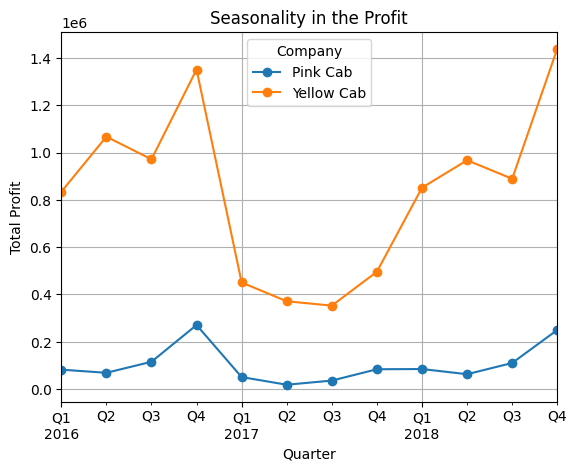

In [241]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index if 'Date of Travel' is currently set as the index
combo_data.reset_index(inplace=True)

# Convert 'Date of Travel' to datetime if it's not already
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])

# Calculate profit for each quarter
combo_data['Quarter'] = combo_data['Date of Travel'].dt.to_period("Q")
quarterly_profit = combo_data.groupby(['Company', 'Quarter'])['Profit'].sum().unstack('Company')

# Plot the seasonal data
quarterly_profit.plot(kind='line', marker='o')
plt.title('Seasonality in the Profit')
plt.xlabel('Quarter')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


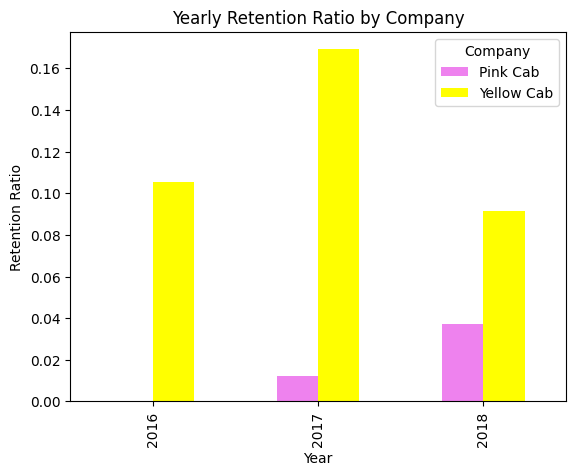

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combo_data has a 'Customer ID', 'Date of Travel', and 'Company' columns

# Convert 'Date of Travel' to datetime
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
combo_data['Year'] = combo_data['Date of Travel'].dt.year

# Calculate unique customers per year for each company
unique_customers = combo_data.groupby(['Year', 'Company'])['Customer ID'].nunique()

# Calculate the retention of customers based on the criteria (e.g., at least 5 rides)
# You'll need to adjust the criteria based on your specific needs
retained_customers = combo_data[combo_data.groupby(['Customer ID'])['Date of Travel'].transform('count') >= 10]
retained_customers_yearly = retained_customers.groupby(['Year', 'Company'])['Customer ID'].nunique()

# Calculate retention ratios (you need to define how you want to handle the first year)
# This is a placeholder; the actual calculation will depend on the logic you define
retention_ratios = (retained_customers_yearly / unique_customers.shift(1)).unstack()

# Plotting the bar plot
retention_ratios.plot(kind='bar', color=['violet', 'yellow'])
plt.title('Yearly Retention Ratio by Company')
plt.xlabel('Year')
plt.ylabel('Retention Ratio')
plt.legend(title='Company')
plt.show()

# For the bubble plot, you would repeat a similar process, but you would plot circles
# with plt.scatter(), and the 's' parameter would be set to a size related to
# the number of retained customers.


In [273]:
# Ensure 'City' is a column in combo_data
if 'City' not in combo_data.columns:
    combo_data.reset_index(inplace=True)

# Calculate the number of rides per customer per year for each company and city
rides_per_customer = combo_data.groupby(['Year', 'Company', 'City', 'Customer ID']).size().reset_index(name='Rides')

# Determine retained customers (e.g., more than 5 rides in a year)
retained_customers = rides_per_customer[rides_per_customer['Rides'] > 5]

# Calculate the retention ratio for each company per city
city_retention = retained_customers.groupby(['City', 'Company'])['Customer ID'].nunique().unstack(fill_value=0)
total_customers_per_city = combo_data.groupby(['City', 'Company'])['Customer ID'].nunique().unstack(fill_value=0)
retention_ratio_per_city = city_retention.div(total_customers_per_city).fillna(0)



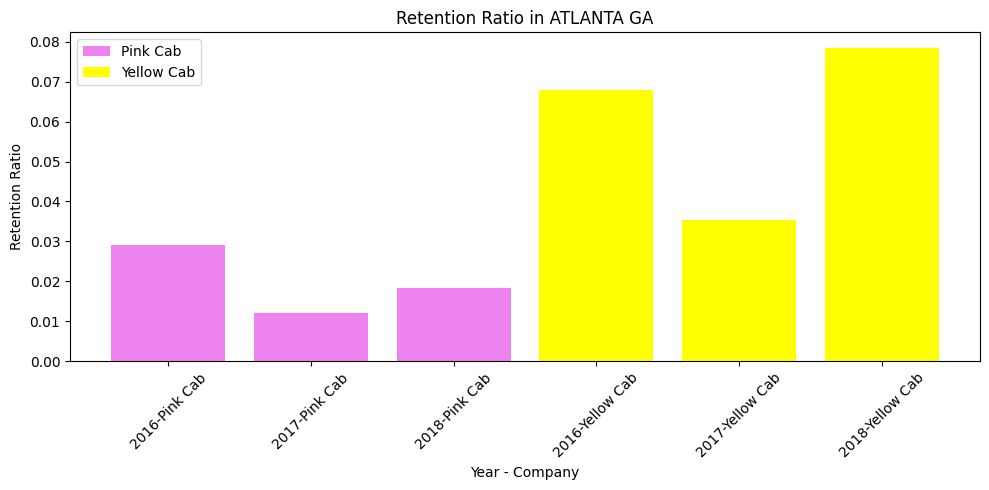

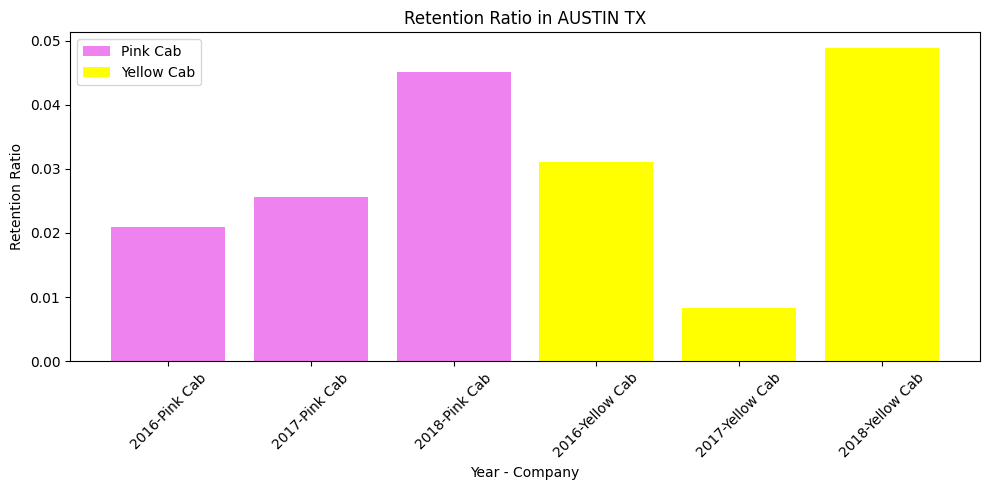

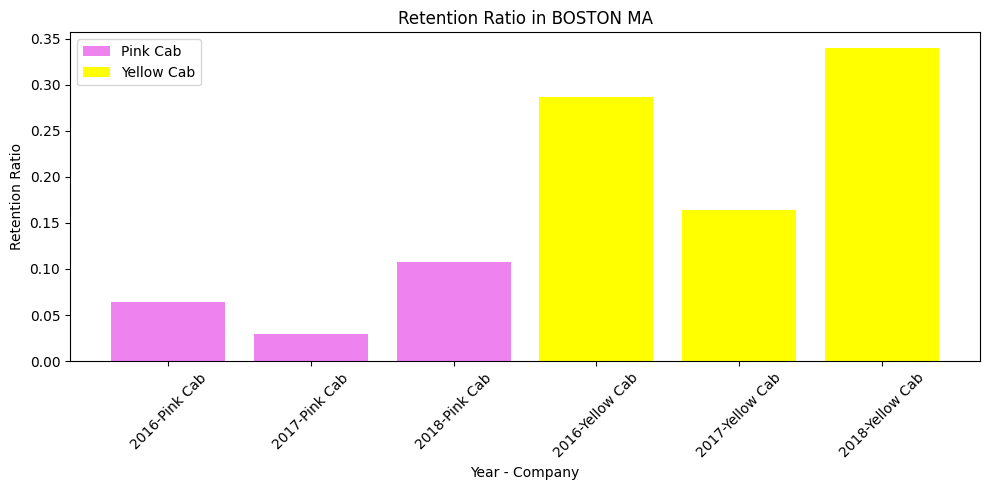

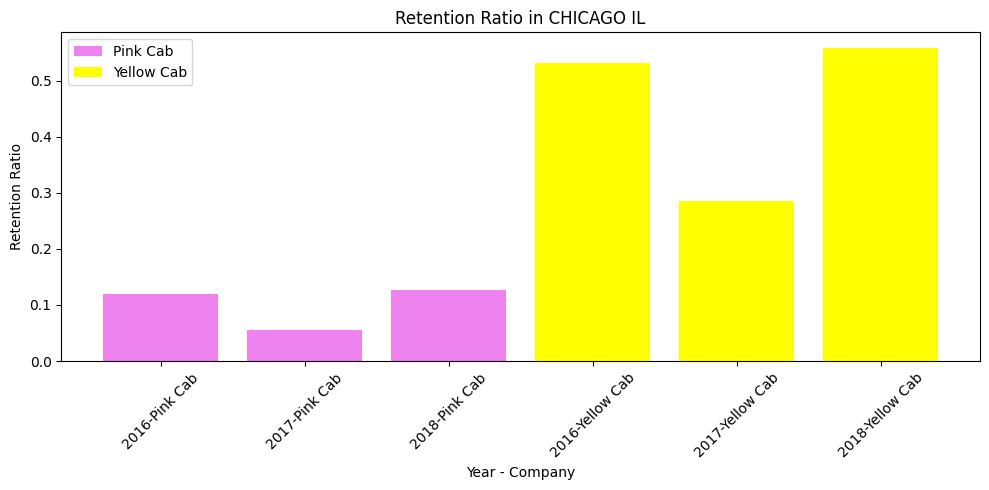

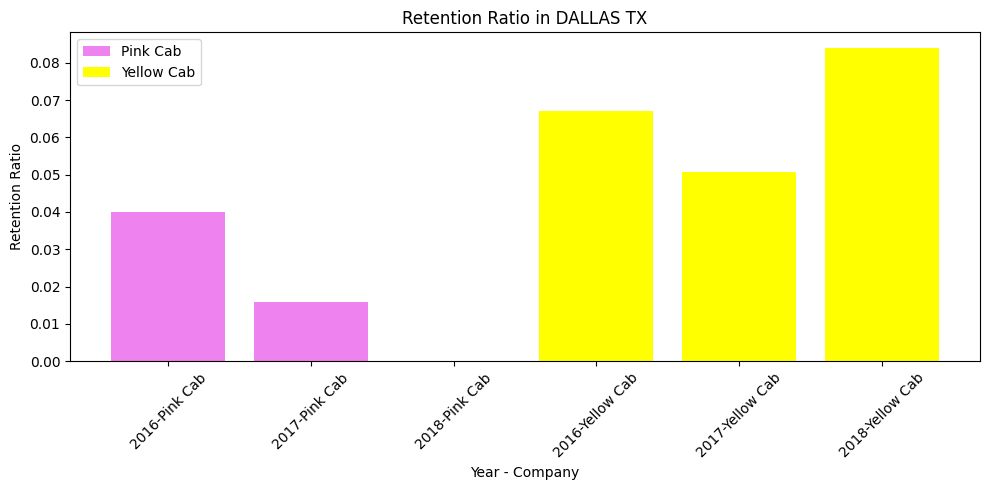

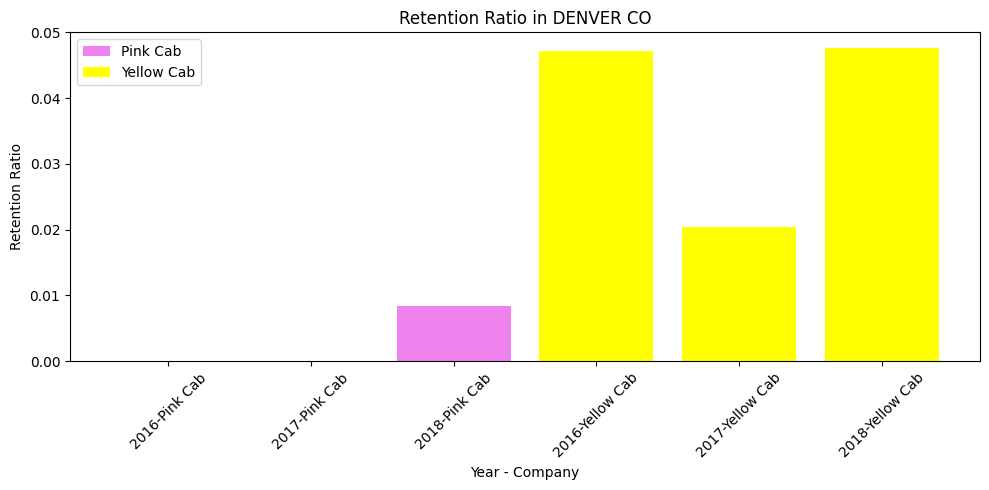

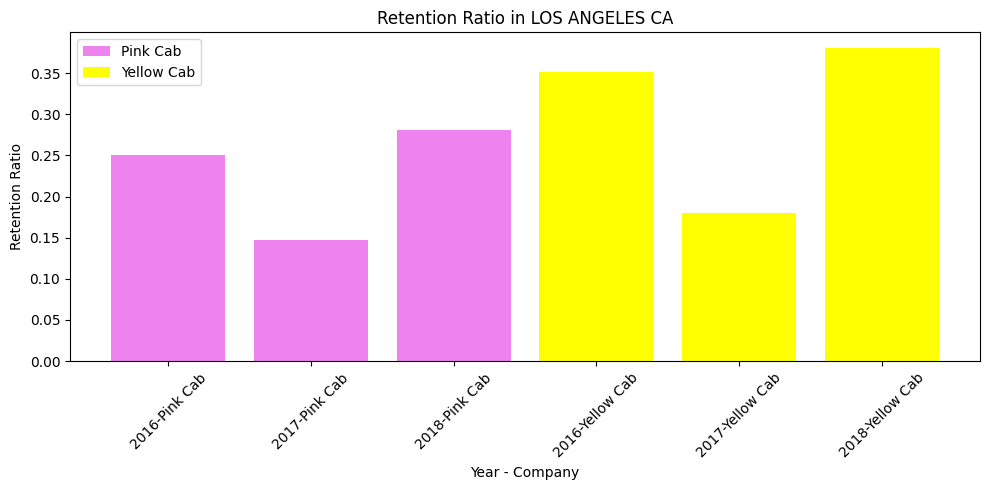

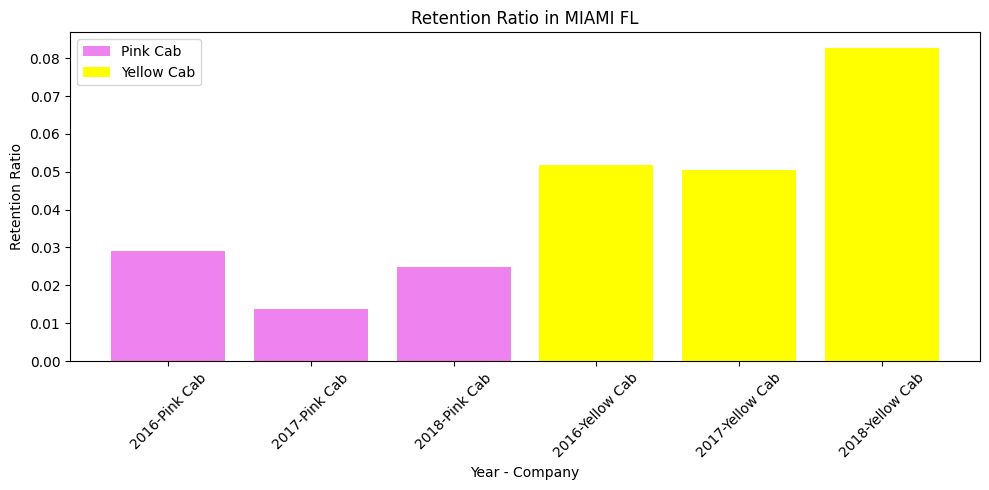

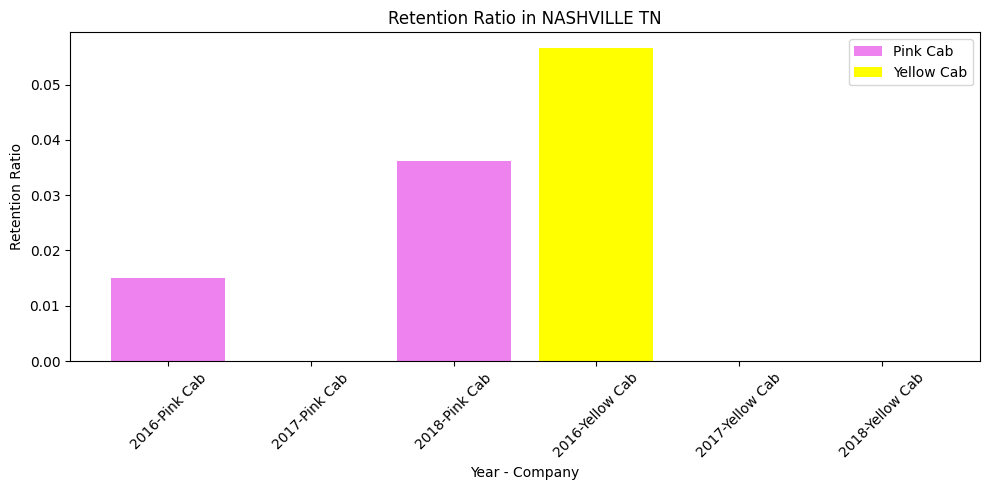

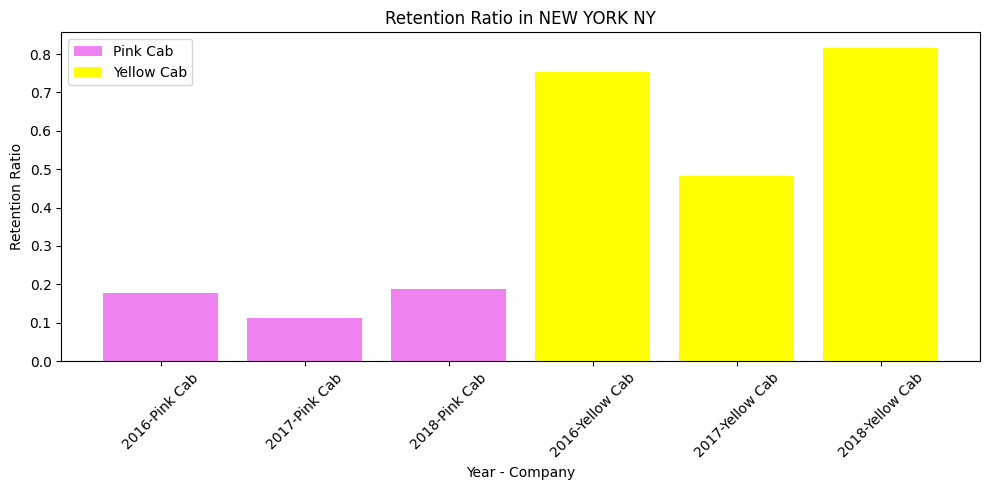

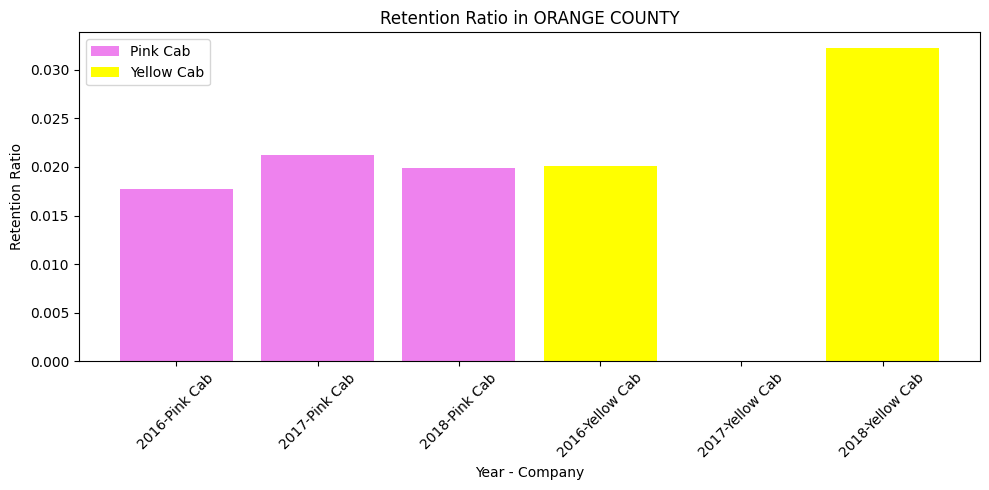

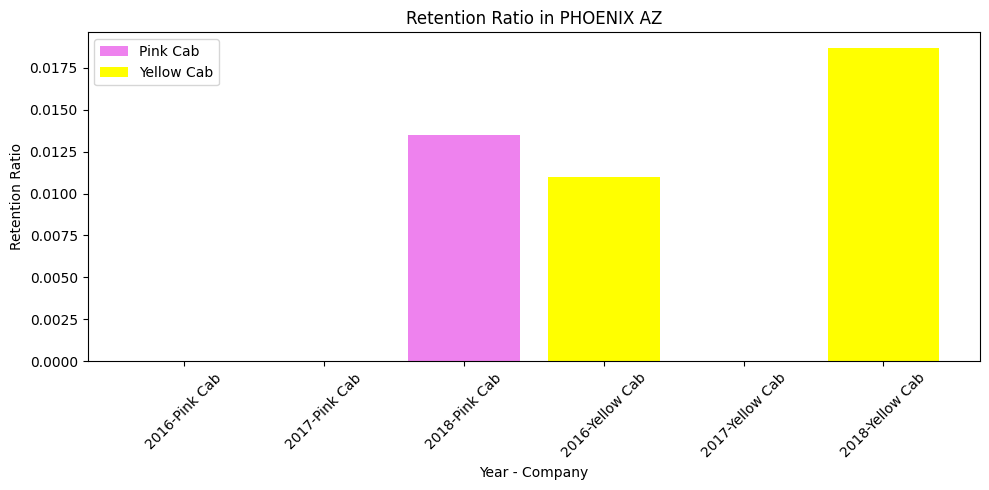

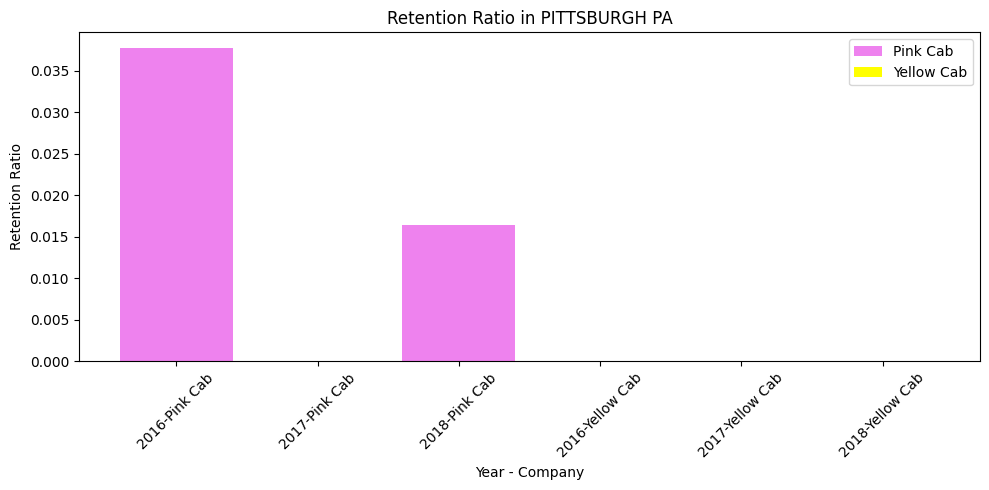

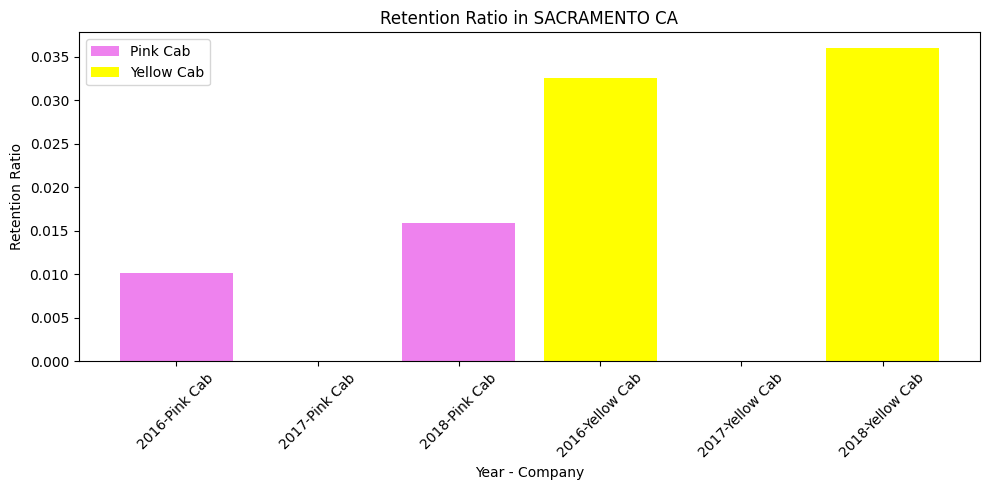

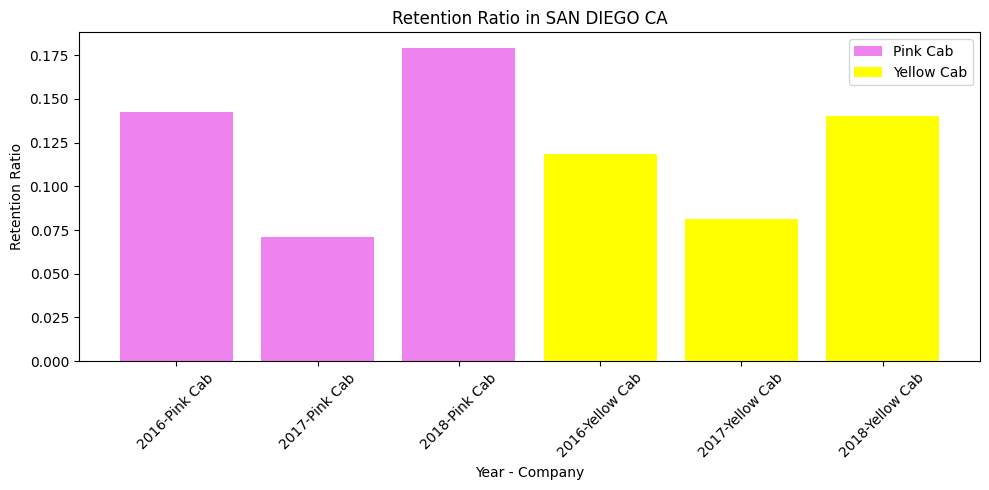

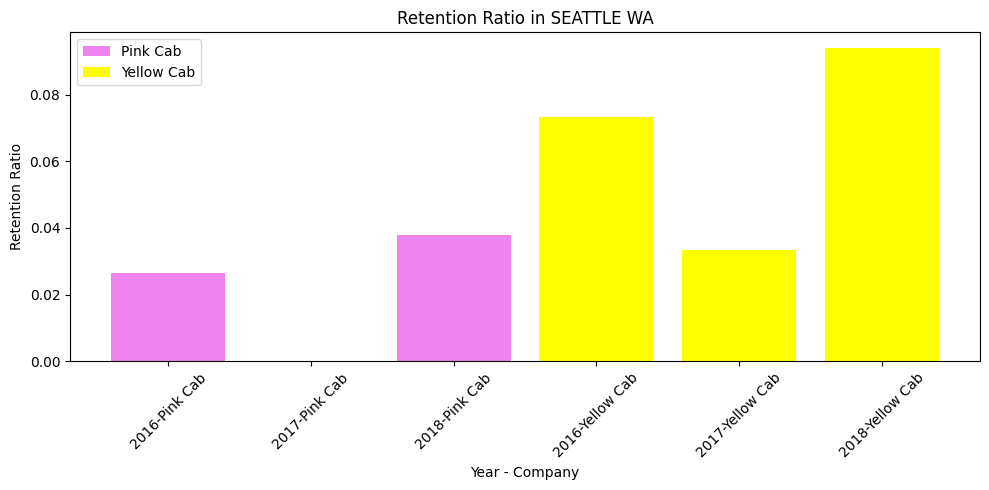

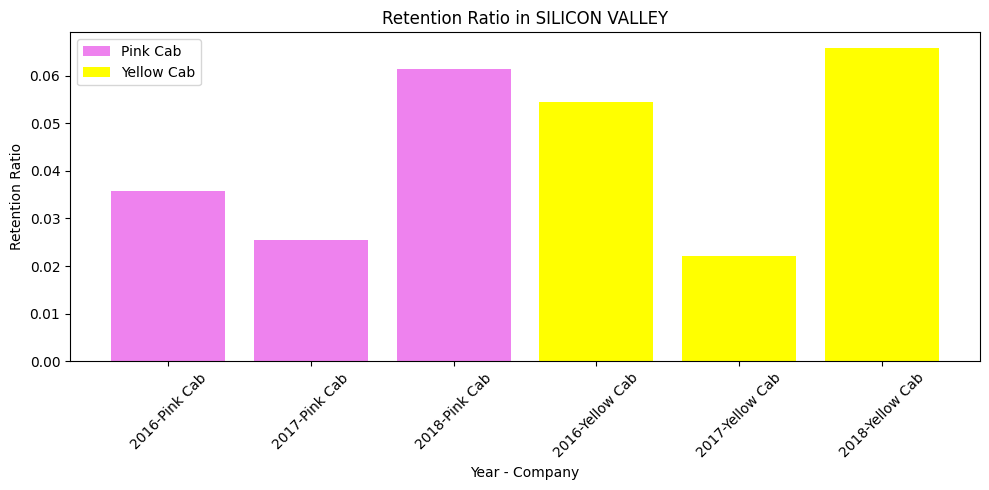

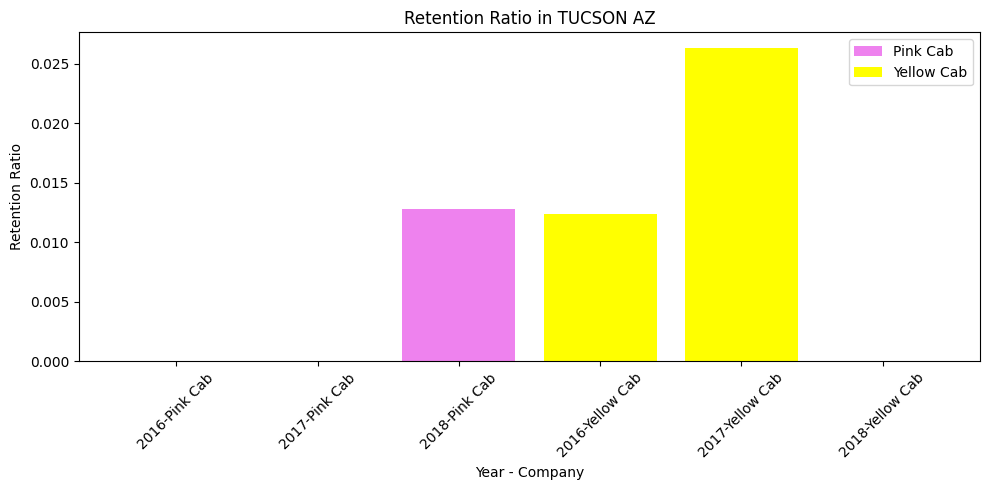

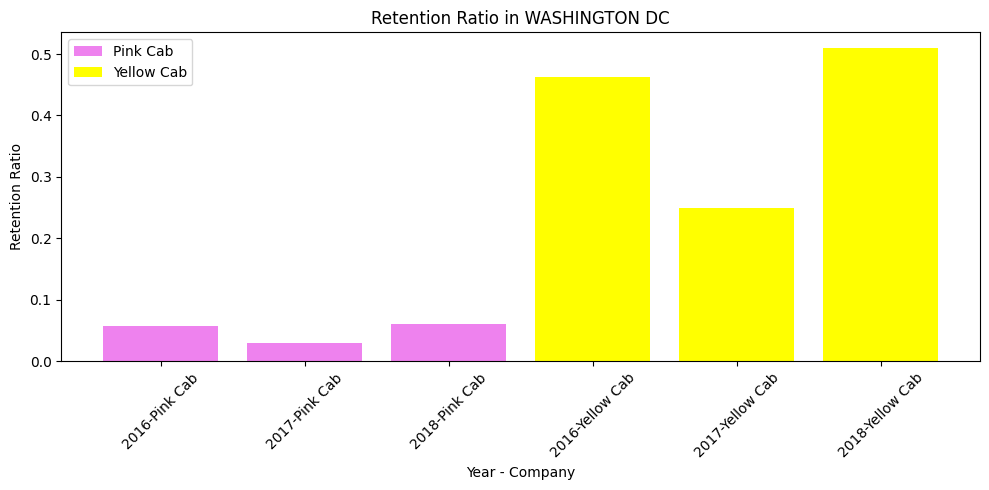

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into `combo_data`
# combo_data = pd.read_csv('your_data.csv')

# Ensure 'Date of Travel' is a datetime object
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
combo_data['Year'] = combo_data['Date of Travel'].dt.year

# Aggregate the number of rides per customer
rides_per_customer = combo_data.groupby(['Customer ID', 'City', 'Company', 'Year']).size().reset_index(name='Rides')

# Define retention: customers with 5+ rides per year
retention_definition = 2
retained_customers = rides_per_customer[rides_per_customer['Rides'] >= retention_definition]

# Count retained customers per city, company, and year
retained_count = retained_customers.groupby(['City', 'Company', 'Year'])['Customer ID'].nunique().reset_index(name='Retained Customers')

# Count total unique customers per city, company, and year
total_customers_count = combo_data.groupby(['City', 'Company', 'Year'])['Customer ID'].nunique().reset_index(name='Total Customers')

# Calculate retention ratio
retention_data = pd.merge(total_customers_count, retained_count, on=['City', 'Company', 'Year'], how='left')
retention_data['Retention Ratio'] = (retention_data['Retained Customers'] / retention_data['Total Customers']).fillna(0)

# Plot retention ratios
cities = retention_data['City'].unique()
for city in cities:
    fig, ax = plt.subplots(figsize=(10, 5))
    city_data = retention_data[retention_data['City'] == city]
    for company in ['Pink Cab', 'Yellow Cab']:
        company_data = city_data[city_data['Company'] == company]
        ax.bar(company_data['Year'].astype(str) + '-' + company, company_data['Retention Ratio'],

               color='violet' if company == 'Pink Cab' else 'yellow', label=company)
    
    ax.set_title(f'Retention Ratio in {city}')
    ax.set_xlabel('Year - Company')
    ax.set_ylabel('Retention Ratio')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
